## Import

In [256]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import root_mean_squared_error
from sklearn.model_selection import train_test_split

## Input Module

In [288]:
ratings = pd.read_csv("ml-100k/u.data", sep="\t", names=["user_id", "movie_id", "rating", "timestamp"])
ratings.describe()

,user_id,movie_id,rating,timestamp
count,100000.00000,100000.000000,100000.000000,1.000000e+05
mean,462.48475,425.530130,3.529860,8.835289e+08
std,266.61442,330.798356,1.125674,5.343856e+06
min,1.00000,1.000000,1.000000,8.747247e+08
25%,254.00000,175.000000,3.000000,8.794487e+08
50%,447.00000,322.000000,4.000000,8.828269e+08
75%,682.00000,631.000000,4.000000,8.882600e+08
max,943.00000,1682.000000,5.000000,8.932866e+08


In [289]:
ratings[ratings['user_id'] == 674]

,user_id,movie_id,rating,timestamp
41809,674,127,5,887762799
42999,674,405,4,887762861
43266,674,294,4,887762296
45813,674,118,3,887763150
46347,674,282,5,887763231
46493,674,929,3,887763150
46914,674,25,4,887763035
49761,674,288,3,887762296
49807,674,117,5,887762861
51433,674,50,4,887762584


In [290]:
user_info = pd.read_csv("ml-100k/u.user", sep="|", names=["user_id", "age", "gender", "occupation", "zip code"])
user_info[user_info['age'] < 16]

,user_id,age,gender,occupation,zip code
29,30,7,M,student,55436
100,101,15,M,student,05146
141,142,13,M,other,48118
178,179,15,M,entertainment,20755
205,206,14,F,student,53115
280,281,15,F,student,06059
288,289,11,M,none,94619
460,461,15,M,student,98102
470,471,10,M,student,77459
608,609,13,F,student,55106


In [318]:
user_item = pd.read_csv(
	"ml-100k/u.item",
	sep="|",
	names=["movie_id", "title", "release_date", "video_release_date", "IMDb_URL", "unknown", "Action", "Adventure", "Animation", "Children's", "Comedy", "Crime", "Documentary", "Drama", "Fantasy", "Film-Noir", "Horror", "Musical", "Mystery", "Romance", "Sci-Fi", "Thriller", "War", "Western"],
	encoding="latin1"
)
movies = user_item[['movie_id', 'title']]
movies.head()

,movie_id,title
0,1,Toy Story (1995)
1,2,GoldenEye (1995)
2,3,Four Rooms (1995)
3,4,Get Shorty (1995)
4,5,Copycat (1995)


In [319]:
children_movies = user_item[(user_item["Animation"] == 1) | (user_item["Children's"] == 1)].set_index('movie_id')
children_movies.head()

,title,release_date,video_release_date,IMDb_URL,unknown,Action,Adventure,Animation,Children's,Comedy,...,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
movie_id,,,,,,,,,,,,,,,,,,,,,
1,Toy Story (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Toy%20Story%2...,0,0,0,1,1,1,...,0,0,0,0,0,0,0,0,0,0
8,Babe (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Babe%20(1995),0,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
35,Free Willy 2: The Adventure Home (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Free%20Willy%...,0,0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0
63,"Santa Clause, The (1994)",01-Jan-1994,NaN,http://us.imdb.com/M/title-exact?Santa%20Claus...,0,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
71,"Lion King, The (1994)",01-Jan-1994,NaN,"http://us.imdb.com/M/title-exact?Lion%20King,%...",0,0,0,1,1,0,...,0,0,0,1,0,0,0,0,0,0


In [329]:
# Étape 1: Identifier les utilisateurs de moins de 16 ans
young_users = user_info[user_info['age'] < 16]['user_id'].tolist()
print(f"Nombre d'utilisateurs de moins de 16 ans: {len(young_users)}")

# Étape 2: Identifier les films d'animation pour enfants (déjà filtré dans user_item)
animation_children_movies = children_movies.index.tolist()
print(f"Nombre de films d'animation et pour enfants: {len(animation_children_movies)}")

# Étape 3: Filtrer les évaluations pour ne conserver que celles des jeunes utilisateurs sur les films d'animation pour enfants
young_users_ratings = ratings[
    (ratings['user_id'].isin(young_users)) & 
    (ratings['movie_id'].isin(animation_children_movies))
]

# Étape 4: Compter le nombre d'utilisateurs uniques de moins de 16 ans ayant noté au moins un film d'animation pour enfants
young_users_who_rated = young_users_ratings['user_id'].nunique()
print(f"Nombre d'utilisateurs de moins de 16 ans ayant noté des films d'animation pour enfants: {young_users_who_rated}")

# Étape 5: Statistiques supplémentaires (facultatif)
print(f"Nombre total d'évaluations par des utilisateurs de moins de 16 ans sur des films d'animation pour enfants: {len(young_users_ratings)}/{len(ratings[(ratings['user_id'].isin(young_users))])}")

Nombre d'utilisateurs de moins de 16 ans: 17
Nombre de films d'animation et pour enfants: 131
Nombre d'utilisateurs de moins de 16 ans ayant noté des films d'animation pour enfants: 17
Nombre total d'évaluations par des utilisateurs de moins de 16 ans sur des films d'animation pour enfants: 177/1259


## Processing Module

In [262]:
train_df, test_df = train_test_split(ratings, test_size=0.2, random_state=0)

In [326]:
child_ratings = ratings[ratings['user_id'] == 30]
child_ratings.sort_values('movie_id', ascending=True)

,user_id,movie_id,rating,timestamp
24820,30,2,3,875061066
18916,30,7,4,875140648
11261,30,28,4,885941321
95723,30,29,3,875106638
40458,30,50,3,875061066
88811,30,69,5,885941156
2857,30,82,4,875060217
84438,30,135,5,885941156
52766,30,161,4,875060883
75704,30,164,4,875060217


In [322]:
utility_matrix = ratings.pivot(index='user_id', columns='movie_id', values='rating')
utility_matrix.fillna(value=0, inplace=True)
#utility_matrix.head()
#utility_matrix.iloc[:19, :13]
#utility_matrix.loc[30][utility_matrix.loc[30] > 0]
children_movies.reindex(child_ratings['movie_id'])['title'].dropna(axis=0)

movie_id
539              Mouse Hunt (1997)
538               Anastasia (1997)
259    George of the Jungle (1997)
304           Fly Away Home (1996)
892                 Flubber (1997)
Name: title, dtype: object

In [ ]:
len(user_item.reindex(child_ratings['movie_id'])['title'].dropna(axis=0))

43

In [264]:
movie_matrix = utility_matrix.T
movie_matrix.head()

user_id,1,2,3,4,5,6,7,8,9,10,...,934,935,936,937,938,939,940,941,942,943
movie_id,,,,,,,,,,,,,,,,,,,,,
1,5.0,4.0,0.0,0.0,4.0,4.0,0.0,0.0,0.0,4.0,...,2.0,3.0,4.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0
2,3.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0
3,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,3.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,...,5.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0
5,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


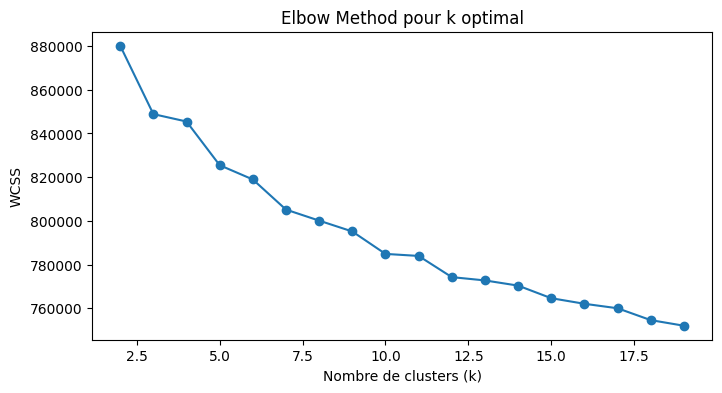

In [265]:
cluster_range = list(range(2, 20))

wcss = []
for k in cluster_range:
    km = KMeans(n_clusters=k, random_state=0).fit(movie_matrix)
    wcss.append(km.inertia_)

plt.figure(figsize=(8,4))
plt.plot(cluster_range, wcss, marker='o')
plt.xlabel("Nombre de clusters (k)")
plt.ylabel("WCSS")
plt.title("Elbow Method pour k optimal")
plt.show()

In [266]:
k = 19
kmeans = KMeans(n_clusters=k, random_state=0, n_init=10)
movie_clusters = kmeans.fit_predict(movie_matrix)

# Création du DataFrame des clusters de films
movie_cluster_df = pd.DataFrame({
    'movie_id': movie_matrix.index,
    'cluster': movie_clusters
}).set_index('movie_id')

movie_cluster_df.head(18)

,cluster
movie_id,
1,4
2,3
3,0
4,3
5,3
6,1
7,4
8,9
9,14


In [274]:
ratings_with_clusters = train_df.merge(movie_cluster_df, on='movie_id')
ratings_with_clusters.head()

,user_id,movie_id,rating,timestamp,cluster
0,70,298,5,884064134,0
1,215,172,4,891435394,0
2,488,210,4,891294896,0
3,916,156,5,880844016,0
4,292,197,5,881105246,0


In [268]:
utility_clustered_matrix = ratings_with_clusters.groupby(['user_id', 'cluster'])['rating'].mean().unstack()
utility_clustered_matrix = utility_clustered_matrix.fillna(0)
utility_clustered_matrix.head(18)

cluster,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
user_id,,,,,,,,,,,,,,,,,,,
1,3.600000,2.820000,4.5,3.175000,3.727273,4.75,4.071429,5.0,4.250000,3.222222,0.0,5.0,3.000000,0.0,5.0,4.50,4.343750,4.0,0.0
2,3.333333,3.333333,5.0,0.000000,3.714286,0.00,0.000000,5.0,0.000000,0.000000,3.0,3.0,3.916667,0.0,5.0,0.00,3.750000,0.0,4.0
3,0.000000,2.590909,0.0,2.000000,0.000000,0.00,0.000000,4.0,4.000000,0.000000,2.0,0.0,2.875000,0.0,0.0,0.00,0.000000,0.0,0.0
4,0.000000,4.444444,0.0,3.000000,5.000000,3.00,4.000000,5.0,0.000000,0.000000,4.0,5.0,4.500000,0.0,0.0,0.00,0.000000,0.0,0.0
5,1.800000,2.045455,0.0,2.756757,3.500000,3.50,3.933333,4.5,3.000000,3.500000,0.0,0.0,0.000000,0.0,5.0,3.00,3.615385,0.0,0.0
6,2.600000,2.961538,5.0,3.333333,2.875000,4.00,3.857143,4.0,3.400000,3.833333,0.0,2.0,3.166667,2.0,4.5,3.00,4.220339,5.0,2.0
7,3.300000,3.555556,4.5,4.015625,3.444444,4.20,4.576923,4.0,4.857143,4.307692,4.0,4.0,3.750000,0.0,5.0,4.60,4.126582,5.0,4.0
8,3.500000,2.142857,4.5,3.750000,4.000000,4.00,4.625000,0.0,5.000000,5.000000,0.0,5.0,0.000000,0.0,0.0,4.50,4.000000,0.0,0.0
9,5.000000,4.750000,0.0,4.666667,4.000000,0.00,0.000000,5.0,0.000000,4.000000,0.0,0.0,4.000000,4.0,0.0,0.00,4.250000,0.0,0.0


In [269]:
similarity_matrix = utility_clustered_matrix.T.corr(method='pearson')
similarity_matrix = similarity_matrix.fillna(0)
similarity_matrix.head(18)

user_id,1,2,3,4,5,6,7,8,9,10,...,934,935,936,937,938,939,940,941,942,943
user_id,,,,,,,,,,,,,,,,,,,,,
1,1.000000,0.058313,-0.009849,0.075065,0.557756,0.709470,0.574588,0.502667,-0.090089,0.278763,...,0.291926,0.262449,0.116331,0.048146,-0.021885,0.169254,0.742071,0.165423,0.369305,0.642951
2,0.058313,1.000000,0.115616,0.205750,-0.060909,-0.021122,0.071239,-0.337671,0.166097,-0.059392,...,-0.018427,0.744546,0.922754,0.750352,0.574020,0.614629,-0.249219,0.539178,-0.381319,0.090005
3,-0.009849,0.115616,1.000000,0.399990,0.081663,-0.115854,0.080505,-0.225920,0.276301,-0.008107,...,0.289838,0.194817,0.004645,0.187366,0.136631,-0.031587,-0.014675,0.308646,0.035965,0.006473
4,0.075065,0.205750,0.399990,1.000000,0.047112,-0.290162,-0.032308,-0.041734,0.206757,-0.403364,...,0.016227,0.194231,0.090310,0.110350,0.404849,0.071746,0.196106,0.335502,0.163380,-0.133086
5,0.557756,-0.060909,0.081663,0.047112,1.000000,0.432588,0.326434,0.312686,0.183759,0.467410,...,0.745662,0.114256,-0.065757,0.293708,-0.081196,-0.025436,0.486539,0.218904,0.366378,0.780787
6,0.709470,-0.021122,-0.115854,-0.290162,0.432588,1.000000,0.445694,0.207353,-0.017118,0.724004,...,0.253512,0.248812,0.123654,0.082323,-0.260167,0.180926,0.349909,0.057691,0.038763,0.556272
7,0.574588,0.071239,0.080505,-0.032308,0.326434,0.445694,1.000000,0.267375,-0.484202,0.064517,...,0.324520,-0.056157,0.038320,-0.007658,-0.380920,-0.000611,0.393168,-0.157062,0.158319,0.383061
8,0.502667,-0.337671,-0.225920,-0.041734,0.312686,0.207353,0.267375,1.000000,-0.070379,0.048099,...,0.187241,-0.094322,-0.196635,-0.412541,-0.359423,-0.096416,0.451734,-0.111579,0.755981,0.511577
9,-0.090089,0.166097,0.276301,0.206757,0.183759,-0.017118,-0.484202,-0.070379,1.000000,0.277440,...,0.242314,0.563269,0.224095,0.452646,0.342744,0.223785,0.125661,0.737542,0.250824,0.050195


In [270]:
k = 2
kmeans = KMeans(n_clusters=k, random_state=42)
movie_clusters = kmeans.fit_predict(movie_matrix)

movie_cluster_df = pd.DataFrame({'movie_id': movie_matrix.index,'cluster': movie_clusters}).set_index('movie_id')
movie_cluster_df.head(18)

,cluster
movie_id,
1,0
2,0
3,1
4,0
5,1
6,1
7,0
8,0
9,0


In [271]:
ratings_with_clusters = ratings.merge(movie_cluster_df, on='movie_id')
print(ratings_with_clusters.head())

utility_clustered_matrix = ratings_with_clusters.groupby(['user_id', 'cluster'])['rating'].mean().unstack()
utility_clustered_matrix.head(18)

   user_id  movie_id  rating  timestamp  cluster
0      196       242       3  881250949        1
1      186       302       3  891717742        0
2       22       377       1  878887116        1
3      244        51       2  880606923        1
4      166       346       1  886397596        1


cluster,0,1
user_id,,
1,4.080292,3.133333
2,4.068966,3.393939
3,2.727273,2.813953
4,4.222222,4.400000
5,3.486486,2.440000
6,3.704545,3.518987
7,4.331461,3.675556
8,4.204545,2.600000
9,4.333333,4.200000


In [272]:
similarity_matrix = utility_clustered_matrix.T
similarity_matrix = similarity_matrix.corr(method='pearson')
similarity_matrix.head(18)


user_id,1,2,3,4,5,6,7,8,9,10,...,934,935,936,937,938,939,940,941,942,943
user_id,,,,,,,,,,,,,,,,,,,,,
1,1.0,1.0,-1.0,-1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,-1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
2,1.0,1.0,-1.0,-1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,-1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
3,-1.0,-1.0,1.0,1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,...,-1.0,-1.0,1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
4,-1.0,-1.0,1.0,1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,...,-1.0,-1.0,1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
5,1.0,1.0,-1.0,-1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,-1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
6,1.0,1.0,-1.0,-1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,-1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
7,1.0,1.0,-1.0,-1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,-1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
8,1.0,1.0,-1.0,-1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,-1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
9,1.0,1.0,-1.0,-1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,-1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


In [273]:
normalization_matrix = (similarity_matrix - similarity_matrix.min())/(similarity_matrix.max() - similarity_matrix.min())
threshold = 0.01
normalization_matrix = normalization_matrix.where(abs(normalization_matrix) > threshold, 0)
normalization_matrix.head(18)

user_id,1,2,3,4,5,6,7,8,9,10,...,934,935,936,937,938,939,940,941,942,943
user_id,,,,,,,,,,,,,,,,,,,,,
1,1.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
2,1.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
3,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,1.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
6,1.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
7,1.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
8,1.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
9,1.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
